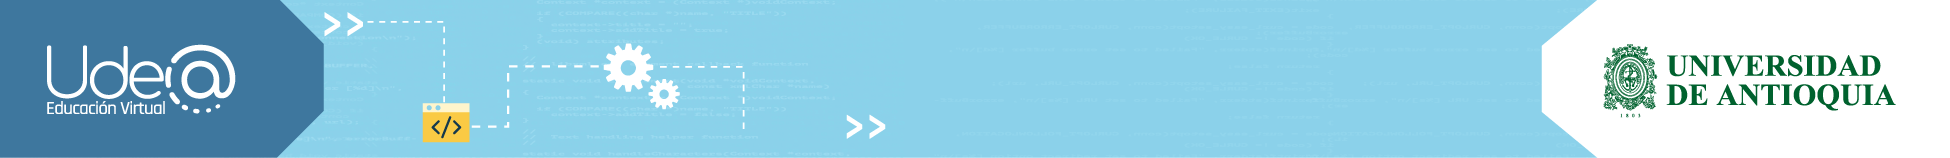

# <font color='157699'> **Visualización de datos. Introducción** </font>

**plotnine** es una poderosa librería de visualización de datos en Python que está inspirada en el popular sistema de gráficos ggplot2 de R. Esta librería permite crear gráficos de alta calidad y personalizados de manera sencilla y efectiva.

**plotnine** se basa en una gramática de gráficos que comprende elementos básicos, como capas, estéticas, geometrías y facetas. Esto facilita la creación de gráficos al seguir una estructura coherente y fácil de entender.

*   Capas: en esta librería, los gráficos se construyen por medio de capas. Se pueden agregar capas adicionales a un gráfico para superponer diferentes elementos, como puntos, líneas, barras y más.

*   Estéticas: son atributos visuales que mapean datos a propiedades visuales del gráfico, como color, forma, tamaño y posición. Las estéticas permiten crear gráficos altamente personalizados que resaltan patrones en los datos.

*   Geometrías: definen la forma en que los datos se representan visualmente, como puntos, barras, líneas, áreas, etc. Se pueden cambiar de manera fácil la geometría de un gráfico para ajustarse a las necesidades de visualización.

*   Facetas: permiten dividir el gráfico en subgráficos, lo que facilita la comparación de patrones en diferentes grupos de datos.

# <font color='157699'> **Uso** </font>

Para utilizar plotnine basta con importarlo al inicio del código de la siguiente manera:

In [ ]:
# Colab no incluye plotnine de forma predeterminada (todavía), por lo que debemos instalarlo
!pip install plotnine
# solución temporal para Colab que tiene una versión anterior de statsmodels
!pip install statsmodels -U

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

from plotnine import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


El paquete plotnine permite crear gráficos complejos a partir de datos en un DataFrame. Utiliza configuraciones predeterminadas que ayudan a crear gráficos de calidad con una cantidad mínima de ajustes y personalización.

Los gráficos de plotnine se construyen paso a paso al agregar nuevos elementos y superponiéndolos mediante el operador +. Colocar los pasos individuales juntos entre paréntesis () proporciona una sintaxis compatible con Python.

## <font color='157699'> **Para construir un gráfico con plotnine, necesitamos un DataFrame**

El siguiente es un DataFrame relacionado con productos en un supermercado. A continuación, se describen sus columnas:

1. categoria: representa las categorías de alimentos a las que pertenecen los productos. Se incluyen 'vegetales', 'frutas', 'carnes', 'comida chatarra' y 'postres'.

2. calorias: indica la cantidad de calorías que tienen los productos. Los valores de calorías se generaron de manera aleatoria en un rango de 50 a 300. Para las categorías 'vegetales' y 'frutas' se redujo de forma aleatoria un valor entre 10 y 30 para reflejar que tienden a tener menos calorías, mientras que para las categorías 'comida chatarra' y 'postres' se aumentó aleatoriamente un valor entre 10 y 30 para indicar que tienden a tener más calorías.

3. precios: muestra los precios de los productos. Los valores de precios se generaron de modo aleatorio en un rango de 500 a 10000.

4. supermercado: indica a qué supermercado pertenece cada producto. Los productos se asignaron aleatoriamente a los 'Supermercado 1', 'Supermercado 2' o 'Supermercado 3'.

El DataFrame tiene un total de 500 filas de datos, donde cada fila representa un producto con información sobre su categoría, calorías, precio y supermercado al que pertenece.

In [ ]:
import random
import pandas as pd
import numpy as np

# semilla aleatoria para la reproducibilidad
random.seed(123)

# ccategorías de alimentos
categoria = ['vegetales', 'frutas', 'carnes', 'comida chatarra', 'postres']

# lista vacía para almacenar los datos
data = []

# 500 filas de datos
for _ in range(500):
    categoria = random.choice(categoria)
    calorias = random.randint(50, 300)
    precios = random.uniform(500, 10000)
    IVA = random.choice([10, 15, 20, 25, 30, 35])
    supermercado = random.choice(['Supermercado 1', 'Supermercado 2', 'Supermercado 3'])

    data.append([categoria, calorias, precios, IVA, supermercado])

# crear un DataFrame a partir de la lista de datos
df = pd.DataFrame(data, columns=['categoria', 'calorias', 'precios', 'IVA', 'supermercado'])

# ajuste del DataFrame para que haga algo de sentido
df.loc[df['categoria'].isin(['vegetales', 'frutas']), 'calorias'] = df['calorias'] - random.randint(10, 30)
df.loc[df['categoria'].isin(['comida chatarra', 'postres']), 'calorias'] = df['calorias'] + random.randint(10, 30)
df.loc[df['supermercado'] == 'Supermercado 3', 'precios'] = df['precios'] + random.uniform(100, 3000)
df.loc[df['supermercado'] == 'Supermercado 2', 'IVA'] = df['IVA'] + random.choice([5, 10, 15])

# crear a nueva variable con la suma de 'precios' e 'IVA'
df['precios_con_IVA'] = df['precios'] + (df['precios'] * df['IVA'] / 100)

print(df)

     categoria  calorias       precios  IVA    supermercado  precios_con_IVA
0    vegetales        98   1328.273436   40  Supermercado 2      1859.582811
1            e       264   9061.389341   25  Supermercado 2     11326.736676
2            e       137   8594.822880   15  Supermercado 1      9884.046312
3            e       193   3671.065749   15  Supermercado 1      4221.725611
4            e       281   6616.520835   10  Supermercado 3      7278.172919
..         ...       ...           ...  ...             ...              ...
495          e       112   3572.621447   25  Supermercado 2      4465.776809
496          e       211   3121.786699   30  Supermercado 2      4058.322709
497          e       197  10568.988953   30  Supermercado 3     13739.685639
498          e        86   2915.648763   25  Supermercado 2      3644.560954
499          e       229  11742.636893   30  Supermercado 3     15265.427962

[500 rows x 6 columns]



### <font color='5adcff'> **Paso 1.** <font color='000000'>Asociar el gráfico a un DataFrame específico con el argumento "data".


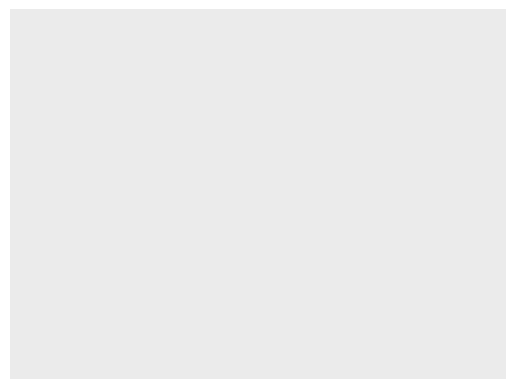

<ggplot: (8713303086032)>

In [ ]:
(ggplot(data=df))

Como no hemos definido nada más, solo está disponible y se muestra una figura vacía.

### <font color='5adcff'>**Paso 2.** <font color='000000'>Definir las estéticas (aes), para lo cual se seleccionan las variables utilizadas en el gráfico y se las asigna a una presentación. Incluye el tamaño, la forma, el color, etc. Se puede interpretar esto como: qué variables influirán en los objetos/geometrías representados en el gráfico.

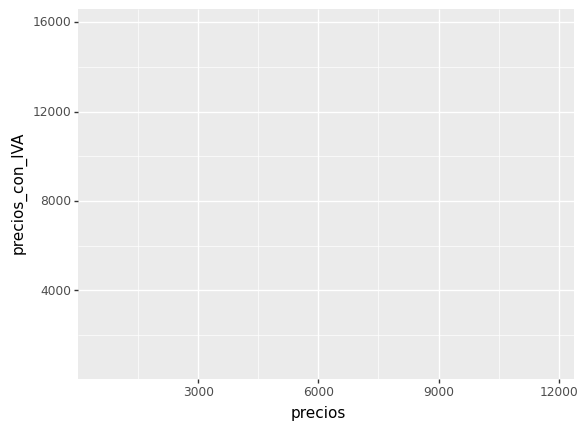

<ggplot: (8713302930886)>

In [ ]:
(ggplot(data=df, mapping=aes(x='precios', y='precios_con_IVA')))

Todavía no se ha trazado ningún dato específico, ya que debemos definir qué tipo de geometría se utilizará para el gráfico. Lo más sencillo es usar puntos, pues son una de las opciones de geometría que representan de manera gráfica los datos. Para agregar una geometría al gráfico, utiliza el operador +.

### <font color='5adcff'> **Paso 3.** <font color='000000'> Definir el tipo de geometrías.

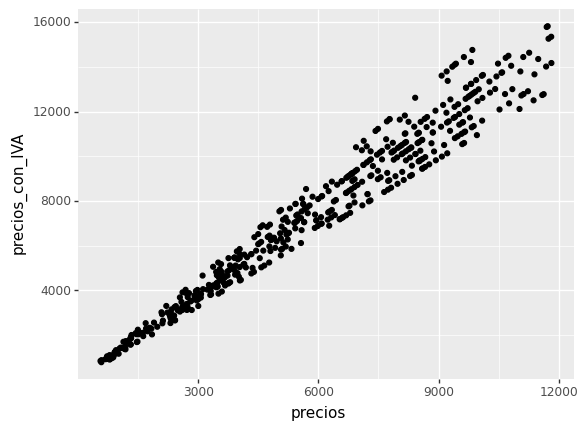

<ggplot: (8713302861686)>

In [ ]:
(ggplot(data=df, mapping=aes(x='precios', y='precios_con_IVA'))
+ geom_point())

El operador + en el paquete plotnine es en particular útil, porque te permite modificar objetos de plotnine existentes. Esto significa que puedes configurar plantillas de gráficos y explorar diferentes tipos de gráficos de manera conveniente.

## <font color='5adcff'> **Ejercicio 1:** <font color='000000'>grafica la relación entre calorías y precios, utiliza una gráfica de dispersión.

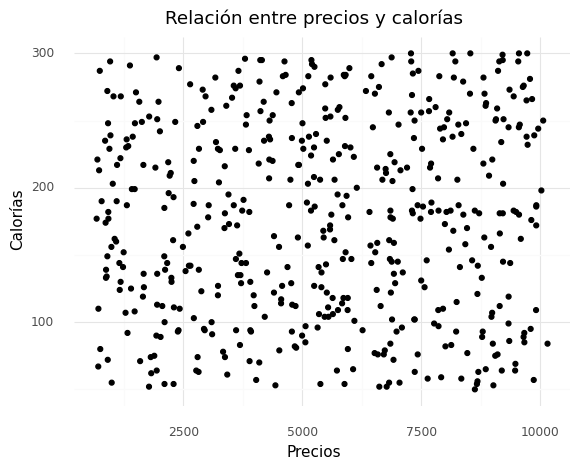

In [ ]:
scatter_plot = (ggplot(df, aes(x='precios', y='calorias')) +
                geom_point() +
                labs(title='Relación entre precios y calorías',
                     x='Precios', y='Calorías') +
                theme_minimal())

print(scatter_plot)

## <font color='5adcff'> **Ejercicio 2:**<font color='000000'> grafica la relación entre calorías y alimentos, usa un diagrama de caja.

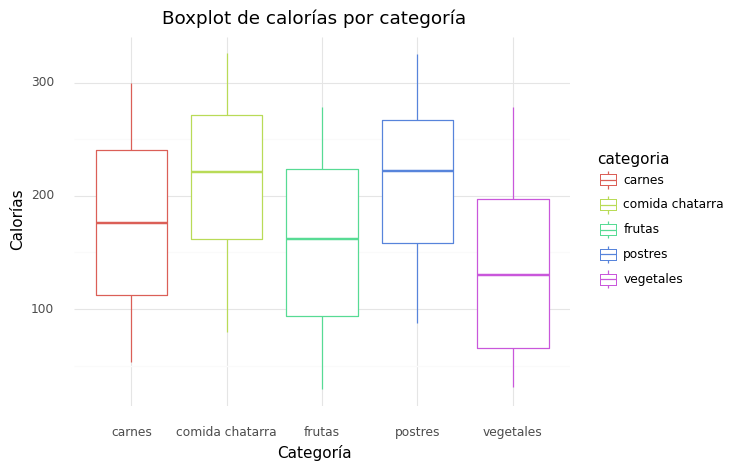

<ggplot: (8779810083198)>

In [ ]:
(ggplot(df, aes(x='categoria', y='calorias', color='categoria'))
 + geom_boxplot()
 + labs(title='Boxplot de calorías por categoría',
        x='Categoría', y='Calorías')
 + theme_minimal()
)

## <font color='5adcff'> **Ejercicio 3:** <font color='000000'> grafica *boxplots* de los precios de la carne en los tres supermercados, utiliza una gráfica de dispersión.

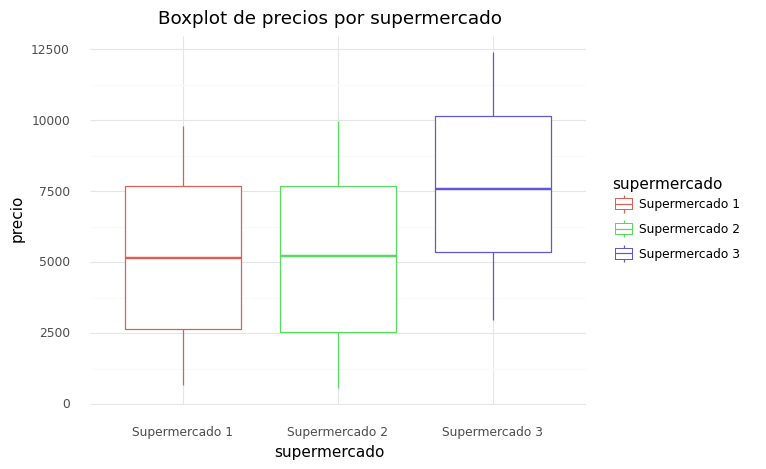

<ggplot: (8779809433685)>

In [ ]:
(ggplot(df, aes(x='supermercado', y='precios', color='supermercado'))
 + geom_boxplot()
 + labs(title='Boxplot de precios por supermercado',
        x='Supermercado', y='Precio')
 + theme_minimal()
)

· Universidad de Antioquia · Ude@ Educación Virtual ·